In [447]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import wavfile
import sklearn
import sys
import os
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from librosa.feature import mfcc
from matplotlib.pyplot import specgram

In [69]:
samplerate, data = wavfile.read('./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav')
print(samplerate, data.shape)
data = np.asarray(data)
data

44100 (7938000, 2)


C:\Users\super\AppData\Local\Temp/ipykernel_1100/581660113.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav')


array([[   0,    0],
       [   0,    0],
       [   0,    1],
       ...,
       [6122, 3141],
       [5149, 3416],
       [4039, 2506]], dtype=int16)

(array([[1.29152035e-04, 2.09753703e-03, 1.58818720e-02, ...,
         2.13629302e+05, 1.26362483e+05, 4.83735771e+05],
        [1.53195699e-04, 9.44775884e-04, 1.05581433e-02, ...,
         1.83442618e+05, 1.53563290e+05, 3.58255955e+05],
        [7.65739985e-05, 1.15546463e-04, 1.28125957e-04, ...,
         3.10505517e+03, 5.15929566e+03, 1.12420707e+04],
        ...,
        [2.29124565e-07, 1.23333075e-05, 4.33757415e-05, ...,
         1.56735467e-07, 2.52615105e-06, 1.35711525e-07],
        [2.28307390e-06, 1.81153837e-06, 1.59631759e-06, ...,
         1.76327678e-06, 3.26942499e-06, 4.13143494e-07],
        [2.67923554e-06, 4.62827138e-08, 8.11970398e-07, ...,
         8.16905516e-07, 1.49387776e-06, 2.56131489e-07]]),
 array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         

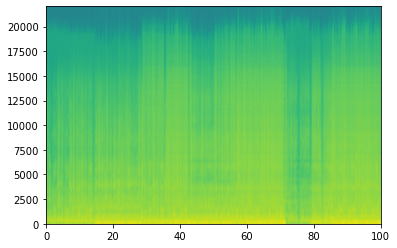

In [61]:
left = [row[0] for row in data]
right = [row[1] for row in data]

monodata = np.average(data, axis=1)

# data.reshape(-1,2).mean(axis=1).reshape(data.shape[0],-1)

# monodata
specgram(monodata, Fs = samplerate, xextent=(0,100))

(array([[2.59964826e-04, 3.74989347e-03, 1.81986439e-02, ...,
         2.15684930e+05, 1.79400070e+05, 4.03817759e+05],
        [2.61874308e-04, 1.83864013e-03, 9.91555871e-03, ...,
         1.86749875e+05, 2.15508929e+05, 2.96349543e+05],
        [9.71414396e-05, 1.03183479e-04, 8.22157952e-05, ...,
         6.94408598e+03, 9.30954742e+03, 1.05860857e+04],
        ...,
        [3.39227690e-06, 4.76460430e-05, 1.79327264e-04, ...,
         2.07796347e-06, 7.83423340e-06, 1.74186919e-06],
        [4.76364936e-06, 9.38879731e-06, 6.29832773e-06, ...,
         4.06237862e-06, 7.17813976e-06, 4.41509611e-07],
        [3.80724415e-06, 1.28594389e-07, 2.44263665e-06, ...,
         6.72688654e-07, 2.47050956e-06, 7.10139959e-07]]),
 array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         

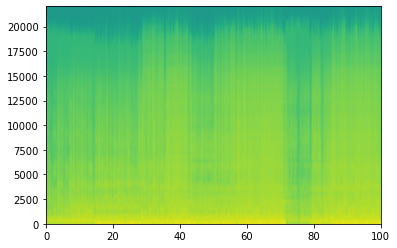

In [31]:
specgram(right, Fs = samplerate, xextent=(0,100))

In [ ]:
sound = AudioSegment.from_wav("./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav")
sound = sound.set_channels(1)
# specgram(sound, Fs = samplerate, xextent=(0,100))

ValueError: only 1-dimensional arrays can be used

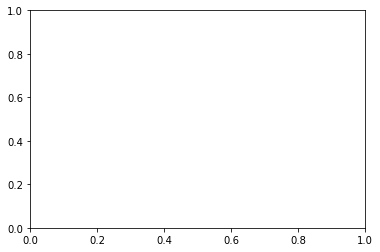

In [39]:
specgram(sound, Fs = samplerate, xextent=(0,100))

In [71]:
artist_list = ["MGK", "Eminem"]

In [62]:
def create_fft(fn) :
    samplerate, data = wavfile.read(fn)
    fft_features = abs(scipy.fft(data)[:1000])
    base_fn, ext = os.path.splitext(fn)
    data_fn = base_fn + ".fft"
    np.save(data_fn, fft_features)

IndentationError: expected an indented block (Temp/ipykernel_1100/2948192477.py, line 1)

In [70]:
def read_fft(artist_list, base_dir=ARTIST_DIR) :
    X = []
    Y = []
    for label, artist in enumerate(artist_list):
        artist_dir = os.path.join(base_dir, genre, "*.fft.npy")
        file_list = glob.glob(artist_dir)
        for fn in artist_list:
            fft_features = np.load(fn)
            X.append(fft_features[:1000])
            Y.append(label)
    return np.array(X), np.array(Y)

IndentationError: expected an indented block (Temp/ipykernel_1100/96264287.py, line 1)

In [91]:
from librosa.feature import mfcc
fn = "./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav"
data , sr = librosa.load(fn, sr=44100)
print(data, sr)

[0.0000000e+00 0.0000000e+00 1.5258789e-05 ... 1.4134216e-01 1.3069153e-01
 9.9868774e-02] 44100


(array([[1.20282206e-13, 1.95348358e-12, 1.47911459e-11, ...,
         1.98957792e-04, 1.17684233e-04, 4.50514044e-04],
        [1.42674613e-13, 8.79891109e-13, 9.83303718e-12, ...,
         1.70844251e-04, 1.43016958e-04, 3.33651858e-04],
        [7.13150934e-14, 1.07611030e-13, 1.19326596e-13, ...,
         2.89180797e-06, 4.80496852e-06, 1.04699942e-05],
        ...,
        [2.13388880e-16, 1.14862877e-14, 4.03968073e-14, ...,
         1.45971278e-16, 2.35266150e-15, 1.26391207e-16],
        [2.12627826e-15, 1.68712658e-15, 1.48668660e-15, ...,
         1.64217947e-15, 3.04488930e-15, 3.84769863e-16],
        [2.49523254e-15, 4.31041361e-17, 7.56206361e-16, ...,
         7.60802549e-16, 1.39128208e-15, 2.38541038e-16]]),
 array([    0.      ,   172.265625,   344.53125 ,   516.796875,
          689.0625  ,   861.328125,  1033.59375 ,  1205.859375,
         1378.125   ,  1550.390625,  1722.65625 ,  1894.921875,
         2067.1875  ,  2239.453125,  2411.71875 ,  2583.984375,
         

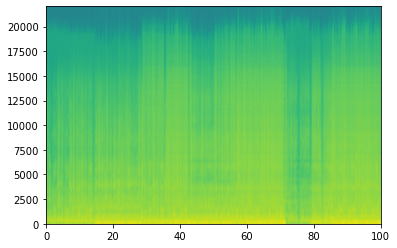

In [86]:
specgram(data, Fs = sr, xextent=(0,100))

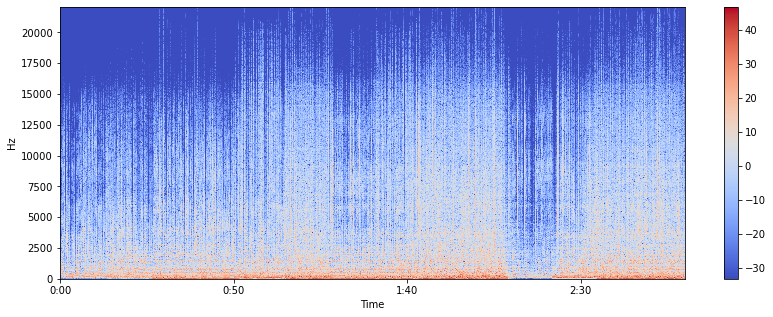

In [89]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [98]:

samplerate, data = wavfile.read(fn)
ceps, mspec, spec = mfcc(data)
print(ceps.shape)

C:\Users\super\AppData\Local\Temp/ipykernel_1100/1801641739.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(fn)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/1801641739.py:2: FutureWarning: Pass y=[[   0    0]
 [   0    0]
 [   0    1]
 ...
 [6122 3141]
 [5149 3416]
 [4039 2506]] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ceps, mspec, spec = mfcc(data)


ParameterError: Audio data must be floating-point

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3852311327.py:1: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 1.5258789e-05 ... 1.4134216e-01 1.3069153e-01
 9.9868774e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)


(20, 15504) <class 'numpy.ndarray'>


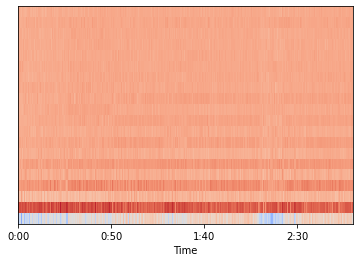

In [96]:
mfccs = librosa.feature.mfcc(data, sr=sr)
print(mfccs.shape, type(mfccs))#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [144]:
cd = os.getcwd()
MGKdir = os.getcwd() + "\\Songs\\MGK\\"
MGKdir
EminemDir = os.getcwd() + "\\Songs\\EMINEM\\"

In [558]:
for wav in os.listdir("Songs/MGK"):
#     fn = "./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav"
#     wav = MGKdir + wav
    data , sr = librosa.load("./Songs/MGK/" + wav, sr=44100)
    print(data.shape)
    mfccData = librosa.feature.mfcc(data, sr=sr)
    basefile, ext = os.path.splitext(wav)
    mfccfile = basefile + ".mfcc"
    np.save(MGKdir + "MFCC\\" + mfccfile, mfccData)
#     print(mfccs, sr)
    break

(5719328,)


C:\Users\super\AppData\Local\Temp/ipykernel_1100/2484882670.py:6: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)


In [103]:
for wav in os.listdir("Songs/MGK"):
    print(os.path.splitext(wav))
    print(wav)
    break

('01 A Girl Like You', '.wav')
01 A Girl Like You.wav


In [135]:
os.getcwd()

'C:\\Users\\super\\Machine Learning\\Final Project'

01 A Girl Like You.mfcc.npy


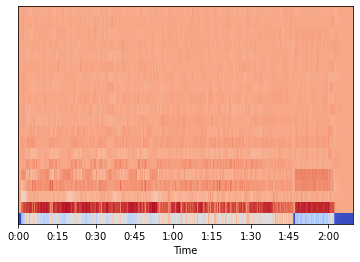

In [140]:
for mfcc in os.listdir("Songs/MGK/MFCC"):
#     fn = "./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav"
#     wav = MGKdir + wav
    mfccData = np.load(MGKdir + "MFCC\\" + mfcc)
    librosa.display.specshow(mfccData, sr=sr, x_axis='time')
    print(mfcc)
    break

In [145]:
for wav in os.listdir("Songs/Eminem"):
    data , sr = librosa.load("./Songs/Eminem/" + wav, sr=44100)
    mfccData = librosa.feature.mfcc(data, sr=sr)
    basefile, ext = os.path.splitext(wav)
    mfccfile = basefile + ".mfcc"
    np.save(EminemDir + "MFCC\\" + mfccfile, mfccData)

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04756165 -0.07078552
 -0.08345032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.17106628 0.16827393 0.16633606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03024292 -0.03007507
 -0.02532959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWa

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.16217041 0.17391968 0.17297363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.04090881 0.0365448  0.02641296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04920959 -0.14033508
 -0.18936157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: 

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.01087952  0.01625061  0.00167847 ... -0.00231934 -0.00042725
 -0.00431824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.17823792 0.15696716 0.12194824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.0115509   0.01089478  0.0103302  ... -0.04249573 -0.04371643
 -0.04634094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWa

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.00247192  0.0035553   0.00404358 ... -0.28823853 -0.2884369
 -0.29045105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-1.5258789e-05  0.0000000e+00 -1.5258789e-05 ... -7.0541382e-02
 -9.3627930e-02 -1.0643005e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-0.00323486 -0.00318909 -0.00276184 ... -0.07385254 -0.03903198
 -0.01132202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-1.5258789e-05  0.0000000e+00 -1.5258789e-05 ... -2.9464722e-02
  2.5634766e-02  9.8144531e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31829834 -0.30090332
 -0.29629517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00015259 -0.01832581
  0.04516602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-4.5776367e-05 -4.5776367e-05  0.0000000e+00 ... -2.4307251e-02
 -3.7185669e-02 -3.5934448e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 1.5258789e-05  3.0517578e-05  1.5258789e-05 ... -1.0681152e-01
 -1.0322571e-01 -8.8745117e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.00991821 0.00924683 0.00822449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipyk

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.01556396 0.0198822  0.02430725 ... 0.15577698 0.15740967 0.15983582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00242615 -0.00491333
 -0.00672913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-0.00028992 -0.00028992 -0.00027466 ...  0.18487549  0.14215088
  0.10017395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWa

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02511597 0.05836487 0.06932068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00 -1.52587891e-05 ... -1.28662109e-01
 -1.25656128e-01 -1.21414185e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipyk

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 3.0517578e-05 -2.5939941e-04 -5.1879883e-04 ...  2.0613098e-01
  8.5739136e-02 -1.7425537e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.00015259 0.00013733 0.00015259 ... 0.10679626 0.06278992 0.03825378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-4.5776367e-05 -4.5776367e-05 -3.0517578e-05 ... -6.5216064e-02
 -2.9144287e-03  4.9346924e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipyk

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 3.0517578e-05 -7.6293945e-05  0.0000000e+00 ... -1.1077881e-01
 -9.4909668e-02 -7.5408936e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-0.00050354 -0.00041199 -0.00048828 ...  0.00167847  0.00267029
  0.00364685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.174469   0.1646576  0.16682434 ... 0.13136292 0.1493988  0.11274719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-5.0506592e-03 -3.4179688e-03 -1.1749268e-03 ... -1.5258789e-05
  3.6621094e-04  7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.0224762  0.02297974 0.02333069 ... 0.10554504 0.06118774 0.01583862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.05471802 0.05461121 0.05091858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:

C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 1.5258789e-05 -4.5776367e-05 -4.5776367e-05 ... -6.9732666e-03
  7.0953369e-03  1.4190674e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[ 0.00363159  0.00518799  0.00605774 ... -0.00596619  0.00846863
  0.01686096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/3345788790.py:3: FutureWarning: Pass y=[-0.0022583  -0.00189209 -0.00187683 ... -0.04611206 -0.05247498
 -0.05477905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccData = librosa.feature.mfcc(data, sr=sr)
C:\Users\super\AppData\Local\Temp/ipykernel_1100/

PermissionError: [Errno 13] Permission denied: './Songs/Eminem/MFCC'

01 3 a.m. - Travis Barker Remix.mfcc.npy


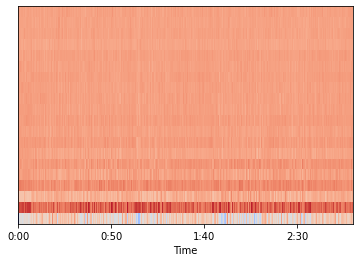

In [254]:
for mfcc in os.listdir("Songs/EMINEM/MFCC"):
#     fn = "./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav"
#     wav = MGKdir + wav
    mfccData = np.load(EminemDir + "MFCC\\" + mfcc)
    librosa.display.specshow(mfccData, sr=sr, x_axis='time')
    print(mfcc)
    break

In [281]:
x = mfccData.T
print(x.shape)
frames, coefs = x.shape
temp = np.mean(x[int(frames*1/10):int(frames*6/10)], axis=0)
print(temp.shape)
print(temp)
print(coefs)
print(frames)
# test = scaler.fit_transform(temp)
# print(test)
# print(test.shape)


(15504, 20)
(20,)
[-1.1065230e+02  1.0350976e+02 -2.9755619e+01  3.7145897e+01
 -1.3582957e+00  1.5976087e+01 -6.3828135e+00  9.8962679e+00
  9.8363824e-02  8.2248230e+00  2.4974034e+00  2.3790901e+00
  1.8168726e+00  4.7628717e+00  1.2573891e+00  4.0320678e+00
 -6.9052038e+00 -3.5392895e-01 -1.4334036e+00  3.6121860e-01]
20
15504


In [566]:
MGKSongs = pd.DataFrame()

for mfcc in os.listdir("Songs/MGK/MFCC"):
    mfccData = np.load(MGKdir + "MFCC\\" + mfcc)
    x = mfccData.T
    frames, coefs = x.shape
    mfccData = np.mean(x[int(frames*1/10):int(frames*6/10)], axis=0)
#     test = scaler.fit_transform(mfccData)
    
    test = pd.DataFrame([mfccData])
    test.insert(20, "Artist", 0)
    MGKSongs = MGKSongs.append(test)
MGKSongs
# MGKSongs_STD = pd.DataFrame(scaler.fit_transform(MGKSongs))
# MGKSongs_STD
    

C:\Users\super\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\super\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Artist
0,-159.545929,166.121384,-21.215572,35.578354,6.963865,19.539167,-8.956448,12.428956,5.935345,2.827000,...,3.121820,-1.647464,-0.804199,3.013386,-1.919305,1.993430,0.216227,0.703446,-3.328345,0
0,-116.772110,113.690598,-12.846150,35.708172,-7.813184,27.617937,-0.564617,12.783113,0.965750,12.102712,...,6.438430,2.544069,3.610677,3.991945,1.805106,3.064812,4.118328,2.636167,1.145486,0
0,-119.223686,113.898911,-2.638810,37.874531,-10.936372,28.897419,-16.099472,9.256930,-6.991161,7.848644,...,7.480069,-0.492799,6.410483,0.033452,5.910886,-4.333644,7.261153,-3.836775,3.811460,0
0,-172.945145,132.528671,-13.241590,47.341846,2.868126,31.052563,-2.388947,14.826306,3.350123,8.233323,...,7.369363,1.507707,4.389051,4.831897,2.433865,-0.751176,0.087663,0.649371,-1.234107,0
0,-134.682709,138.262985,-22.335066,50.768093,-7.536988,28.990290,-6.492405,12.602058,-3.671972,8.904299,...,7.585850,2.180194,2.282683,2.395646,0.899051,1.334392,1.592976,4.875860,-2.244050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-124.771568,112.164574,-6.839469,42.040691,-2.602715,26.539034,-4.332788,14.221277,0.315222,10.243073,...,6.666629,-0.364138,4.559551,1.377007,1.138314,-5.183591,-0.061138,-2.242343,-0.868030,0
0,-118.607239,113.834320,-6.646957,39.453869,-14.677070,29.153145,-2.538341,11.270812,0.760546,7.364369,...,6.829116,1.112522,3.937149,1.867167,2.154428,0.595045,2.727106,0.065360,1.016499,0
0,-112.991295,109.633865,-16.584187,45.271824,-0.860982,28.528278,-7.950814,10.988130,4.999278,9.453517,...,5.374636,4.030734,1.972544,-0.365683,-0.225771,-3.073773,0.036496,-0.663194,-0.340228,0
0,-154.448685,117.051369,-0.291595,37.970779,-11.308473,34.616009,-13.802782,0.416682,-4.994721,-6.056859,...,3.254497,-9.722512,-5.540778,-2.049605,-12.820601,-6.532436,-3.852806,-5.058076,-6.834668,0


In [567]:
EminemSongs = pd.DataFrame()

for mfcc in os.listdir("Songs/Eminem/MFCC"):
    mfccData = np.load(EminemDir + "MFCC\\" + mfcc)
    x = mfccData.T
    frames, coefs = x.shape
    mfccData = np.mean(x[int(frames*1/10):int(frames*6/10)], axis=0)
    test = pd.DataFrame([mfccData])
    test.insert(20, "Artist", 1)
    EminemSongs = EminemSongs.append(test)
EminemSongs
# EminemSongs_STD = pd.DataFrame(scaler.fit_transform(EminemSongs))
# EminemSongs_STD

C:\Users\super\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\super\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Artist
0,-110.652298,103.509758,-29.755619,37.145897,-1.358296,15.976087,-6.382813,9.896268,0.098364,8.224823,...,2.379090,1.816873,4.762872,1.257389,4.032068,-6.905204,-0.353929,-1.433404,0.361219,1
0,-143.447098,137.459976,-46.551914,32.819607,-22.687614,13.821609,-8.321132,-2.406961,1.592016,1.624810,...,5.676819,0.147257,2.430881,1.485127,4.665514,0.029545,-2.789157,2.619297,3.680656,1
0,-212.945816,139.296951,-39.730652,51.273415,3.416954,16.175066,-4.458556,3.275200,-0.008200,3.828184,...,-2.992329,4.162306,-1.415692,2.324019,-3.076012,1.130047,1.712643,2.540797,-3.547148,1
0,-229.389435,107.469872,-22.822870,39.872852,-8.132984,17.895834,-12.514854,-0.737570,-6.720758,-5.817725,...,-6.979105,-7.445094,-4.317589,-4.946820,-5.333502,-1.879128,-1.633821,-3.705425,-2.135124,1
0,-187.433121,115.776665,-18.852339,46.473595,-1.476076,24.098543,-3.347454,13.234456,1.217876,12.282820,...,2.853543,3.713298,6.918202,3.161084,2.539897,3.945211,4.234704,2.104731,2.271767,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-164.257568,122.920990,-3.709218,48.101151,2.357432,31.324690,-10.254819,11.834563,7.874271,5.670231,...,7.590785,4.364729,4.226511,5.106968,5.868017,0.473829,3.552892,2.632421,1.910032,1
0,-287.990662,107.543495,-13.477032,12.295885,4.385547,12.357790,-21.238171,-4.736991,7.147812,-9.334662,...,-0.792491,-1.435142,-8.774842,2.989717,-1.696608,-7.083531,-1.045804,-2.761361,-4.646432,1
0,-181.160568,93.753532,-7.409369,43.236675,-4.603298,19.982468,-3.739727,7.421719,2.208273,3.731436,...,0.732245,-1.262063,-0.787569,-2.379001,-0.295823,0.474308,0.135065,-1.817821,-0.912429,1
0,-161.630188,161.596802,-21.950964,36.225609,6.902156,10.568504,-11.488253,6.892914,0.769396,1.274103,...,8.519148,7.771394,9.722982,2.538850,4.165314,3.799022,-3.355212,0.485991,-3.564075,1


In [568]:
# totalList = MGKSongs.append(EminemSongs)
totalList = pd.concat([MGKSongs, EminemSongs],axis=0)
totalList.reset_index(drop=True, inplace=True)
totalList
totalList.drop([116, 117, 127, 423], axis=0, inplace=True)
totalList

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Artist
0,-159.545929,166.121384,-21.215572,35.578354,6.963865,19.539167,-8.956448,12.428956,5.935345,2.827000,...,3.121820,-1.647464,-0.804199,3.013386,-1.919305,1.993430,0.216227,0.703446,-3.328345,0
1,-116.772110,113.690598,-12.846150,35.708172,-7.813184,27.617937,-0.564617,12.783113,0.965750,12.102712,...,6.438430,2.544069,3.610677,3.991945,1.805106,3.064812,4.118328,2.636167,1.145486,0
2,-119.223686,113.898911,-2.638810,37.874531,-10.936372,28.897419,-16.099472,9.256930,-6.991161,7.848644,...,7.480069,-0.492799,6.410483,0.033452,5.910886,-4.333644,7.261153,-3.836775,3.811460,0
3,-172.945145,132.528671,-13.241590,47.341846,2.868126,31.052563,-2.388947,14.826306,3.350123,8.233323,...,7.369363,1.507707,4.389051,4.831897,2.433865,-0.751176,0.087663,0.649371,-1.234107,0
4,-134.682709,138.262985,-22.335066,50.768093,-7.536988,28.990290,-6.492405,12.602058,-3.671972,8.904299,...,7.585850,2.180194,2.282683,2.395646,0.899051,1.334392,1.592976,4.875860,-2.244050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-164.257568,122.920990,-3.709218,48.101151,2.357432,31.324690,-10.254819,11.834563,7.874271,5.670231,...,7.590785,4.364729,4.226511,5.106968,5.868017,0.473829,3.552892,2.632421,1.910032,1
456,-287.990662,107.543495,-13.477032,12.295885,4.385547,12.357790,-21.238171,-4.736991,7.147812,-9.334662,...,-0.792491,-1.435142,-8.774842,2.989717,-1.696608,-7.083531,-1.045804,-2.761361,-4.646432,1
457,-181.160568,93.753532,-7.409369,43.236675,-4.603298,19.982468,-3.739727,7.421719,2.208273,3.731436,...,0.732245,-1.262063,-0.787569,-2.379001,-0.295823,0.474308,0.135065,-1.817821,-0.912429,1
458,-161.630188,161.596802,-21.950964,36.225609,6.902156,10.568504,-11.488253,6.892914,0.769396,1.274103,...,8.519148,7.771394,9.722982,2.538850,4.165314,3.799022,-3.355212,0.485991,-3.564075,1


In [602]:
x = totalList.loc[:,range(20)].values

y = totalList.loc[:,['Artist']].values
y = y.ravel()
# z = totalList.loc[:,['Artist']]

# x = totalList.values
print(y)
# x_std = scaler.fit_transform(x)


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  
# print(x_std.shape)
# print(z)

# toExcel = pd.DataFrame(x)

# toExcel.to_excel("./Excel/ScaledData.xlsx")



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [603]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  9],
       [ 7, 83]], dtype=int64)

In [604]:
print("Accuracy: " + str(100 * metrics.accuracy_score(y_test, y_pred)) + "%")

Accuracy: 88.32116788321169%


In [595]:
accuracy = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    log_regression = LogisticRegression(max_iter=10000)
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    accuracy += 100 * metrics.accuracy_score(y_test, y_pred)
accuracy /= 100
accuracy

83.51824817518246

In [605]:
accuracy = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=np.random)
    log_regression = LogisticRegression(max_iter=10000)
    log_regression.fit(X_train, y_train)
    y_pred = log_regression.predict(X_test)
    accuracy += 100 * metrics.accuracy_score(y_test, y_pred)
accuracy /= 100
accuracy

83.6277372262774

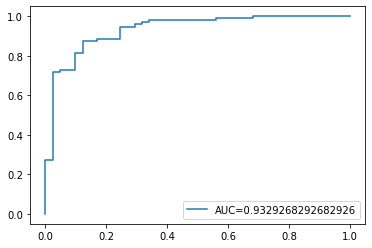

In [606]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

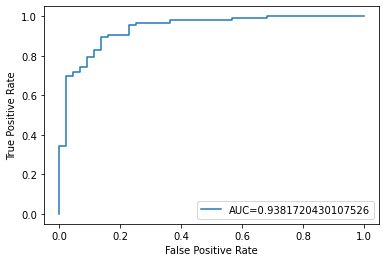

In [614]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [615]:

avg = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=np.random)
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    avg += auc

avg /= 100
avg

0.9246817579420434

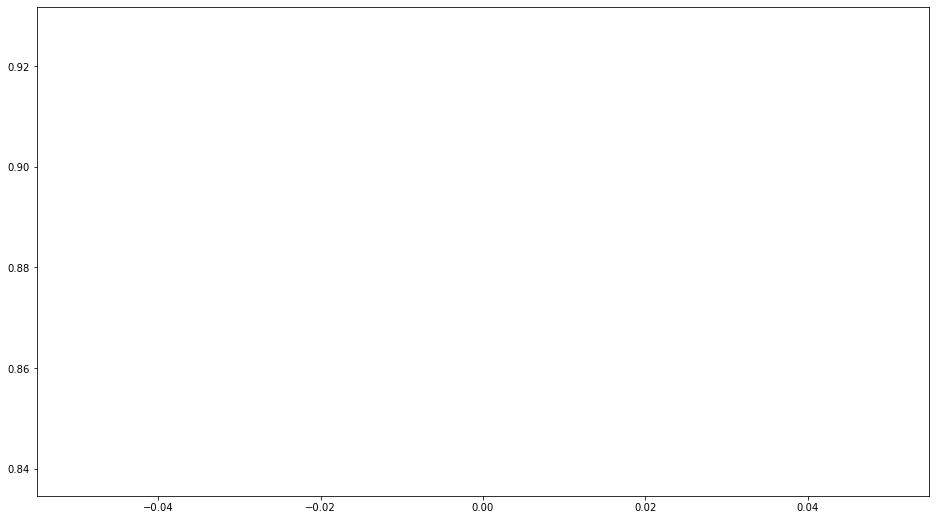

In [556]:
plt.figure(figsize=(16, 9))
plt.plot(metrics.accuracy_score(y_test, y_pred))
    
plt.show()

In [530]:
# 116, 117, 127, 423
temp = x_std
x_std = np.delete(temp, [116, 117, 127, 423], 0)
print(x.shape)

(456, 21)


In [531]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_std)

principalDF = pd.DataFrame(data = principalComponents
                          , columns = ['principal component 1', 'principal component 2'])
principalDF

,principal component 1,principal component 2
0,1.160773,0.047825
1,-2.245262,-1.149065
2,-0.300441,-2.607918
3,-1.328407,-1.163200
4,-1.017562,-1.431117
...,...,...
447,-2.493822,0.697690
448,6.373558,0.864211
449,1.843426,-1.279177
450,-0.071731,1.600011


In [417]:
pca2 = PCA()
pca2.fit(x_std)
evr = pca.explained_variance_ratio_
print(evr)
evr.cumsum()

[0.30474931 0.13615503]


array([0.30474931, 0.44090434])

In [418]:
pca2 = PCA(n_components=8)
pca2.fit(x_std)
evr = pca.explained_variance_ratio_
print(evr)
evr.cumsum()

[0.30474931 0.13615503]


array([0.30474931, 0.44090434])

In [419]:
pca2 = PCA(n_components=9)
pca2.fit(x_std)
evr = pca.explained_variance_ratio_
print(evr)
evr.cumsum()

[0.30474931 0.13615503]


array([0.30474931, 0.44090434])

In [534]:
temp = y
y = np.delete(temp, [116, 117, 127, 423])
yo = pd.DataFrame(y, columns=["Artist"])
yo

,Artist
0,0
1,0
2,0
3,0
4,0
...,...
447,1
448,1
449,1
450,1


In [535]:

finalDf = pd.concat([principalDF, yo[['Artist']]], axis = 1)
finalDf

,principal component 1,principal component 2,Artist
0,1.160773,0.047825,0
1,-2.245262,-1.149065,0
2,-0.300441,-2.607918,0
3,-1.328407,-1.163200,0
4,-1.017562,-1.431117,0
...,...,...,...
447,-2.493822,0.697690,1
448,6.373558,0.864211,1
449,1.843426,-1.279177,1
450,-0.071731,1.600011,1


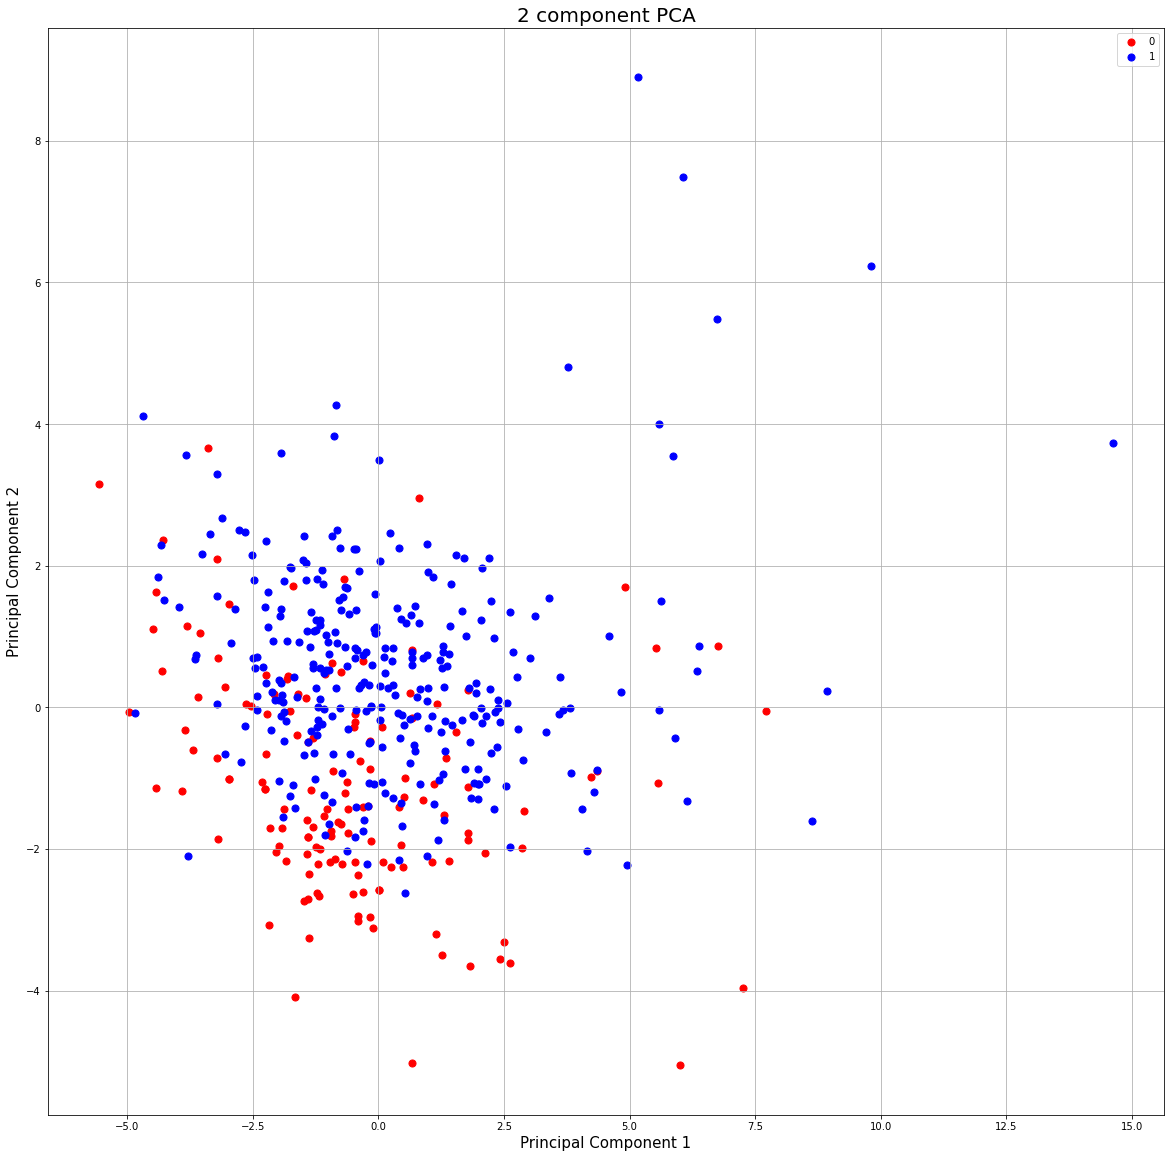

In [540]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Artist'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [289]:
MGKSongs_STD = pd.DataFrame(scaler.fit_transform(MGKSongs))
MGKSongs_STD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.103160,2.258995,-0.623772,-0.324256,1.637706,-0.801912,-0.805973,0.463926,0.606298,-0.810727,0.219941,-0.915988,-0.723666,-0.833987,-0.136968,-1.023649,0.655525,-0.631654,-0.242627,-0.974240
1,1.235202,-0.480807,0.089461,-0.312369,-0.260732,0.196514,0.741538,0.526281,-0.370870,0.928541,0.967643,-0.045925,0.467578,0.317901,0.135134,0.008484,0.985685,0.753790,0.352742,0.636239
2,1.170319,-0.469922,0.959319,-0.113999,-0.661974,0.354640,-2.123195,-0.094560,-1.935433,0.130871,-0.978762,0.227333,-0.395508,1.048400,-0.965581,1.146304,-1.294244,1.869652,-1.641228,1.595930
3,-0.251461,0.503588,0.055762,0.752911,1.111518,0.620987,0.405119,0.886018,0.097968,0.203001,0.395576,0.198291,0.173041,0.520987,0.368695,0.182730,-0.190261,-0.677300,-0.259285,-0.220361
4,0.761184,0.803238,-0.719174,1.066648,-0.225248,0.366118,-0.351587,0.494404,-1.282782,0.328814,0.890133,0.255083,0.364163,-0.028587,-0.308739,-0.242608,0.452434,-0.142838,1.042673,-0.583918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.023490,-0.560550,0.601343,0.267491,0.408668,0.063176,0.046662,0.779493,-0.498783,0.579845,-0.486825,0.013939,-0.358942,0.565472,-0.591986,-0.176302,-1.556166,-0.730132,-1.150068,-0.088582
146,1.186634,-0.473297,0.617749,0.030619,-1.142549,0.386244,0.377570,0.260016,-0.411219,0.040065,-0.543987,0.056566,0.060728,0.403081,-0.455690,0.105290,0.224594,0.259836,-0.439188,0.589807
147,1.335264,-0.692794,-0.229090,0.563362,0.632432,0.309019,-0.620527,0.210245,0.422240,0.431797,0.729208,-0.324995,0.890091,-0.109505,-1.076566,-0.554326,-0.905999,-0.695467,-0.663616,0.101415
148,0.238062,-0.305188,1.159346,-0.105185,-0.709778,1.061380,-1.699670,-1.651028,-1.542874,-2.476520,-2.064541,-0.881182,-3.018614,-2.069810,-1.544804,-4.044687,-1.971830,-2.076367,-2.017446,-2.236438


In [253]:
from sklearn.preprocessing import StandardScaler
x = MGKSongs.loc[:, 'Data'].values
print(x.shape)
x
# x = np.mean
# x = StandardScaler().fit_transform(x)
# y = x
# count = 0
# for piece in x:
#     np.put(y, [count], StandardScaler().fit_transform(piece))
#     count += count
# y

(150,)


array([-4.358899116516113,
       array([[-551.16113  , -551.16113  , -551.16113  , ...,  -86.759575 ,
                -90.97862  ,  -91.09497  ],
              [   0.       ,    0.       ,    0.       , ...,  128.50406  ,
                130.12233  ,  138.88255  ],
              [   0.       ,    0.       ,    0.       , ...,  -28.222073 ,
                -32.018192 ,  -29.202805 ],
              ...,
              [   0.       ,    0.       ,    0.       , ...,    5.6588416,
                  3.2455902,    4.2292566],
              [   0.       ,    0.       ,    0.       , ...,    6.439043 ,
                  8.808972 ,    9.996917 ],
              [   0.       ,    0.       ,    0.       , ...,    2.766037 ,
                 -1.3742213,   -2.9522758]], dtype=float32)                ,
       array([[-5.47983215e+02, -5.47983215e+02, -5.47983215e+02, ...,
               -8.15627441e+01, -9.14956207e+01, -9.84803085e+01],
              [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [230]:
x

array([array([[-543.7028, -543.7028, -543.7028, ..., -543.7028, -543.7028,
               -543.7028],
              [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
                  0.    ],
              [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
                  0.    ],
              ...,
              [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
                  0.    ],
              [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
                  0.    ],
              [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
                  0.    ]], dtype=float32)                                ,
       array([[-551.16113  , -551.16113  , -551.16113  , ...,  -86.759575 ,
                -90.97862  ,  -91.09497  ],
              [   0.       ,    0.       ,    0.       , ...,  128.50406  ,
                130.12233  ,  138.88255  ],
              [   0.       ,    0.       ,    0.       , ...,  -28.222073 ,
    

In [ ]:
num_clusters = 2
from sklearn.cluster import KMeans

#     librosa.display.specshow(mfccData, sr=sr, x_axis='time')
#     print(mfcc)


km = KMeans(n_clusters=num_clusters, init='random', n_init=1, verbose=1)
km.fit

In [163]:
for mfcc in os.listdir("Songs/EMINEM/MFCC"):
#     fn = "./Songs/MGK Organized/24kGoldn, Machine Gun Kelly, Tommy Lee, Audio Chateau/Climb/01 Climb.wav"
#     wav = MGKdir + wav
    mfccData = np.load(EminemDir + "MFCC\\" + mfcc)
    test = pd.DataFrame([mfccData, mfcc])
    test.describe()
    print(test)
    #     librosa.display.specshow(mfccData, sr=sr, x_axis='time')
#     print(mfcc)
    break


                                                   0
0  [[-529.3669, -529.3669, -529.3669, -529.3669, ...
1           01 3 a.m. - Travis Barker Remix.mfcc.npy


C:\Users\super\anaconda3\lib\site-packages\pandas\core\internals\construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform()

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

NameError: name 'y_test' is not defined


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


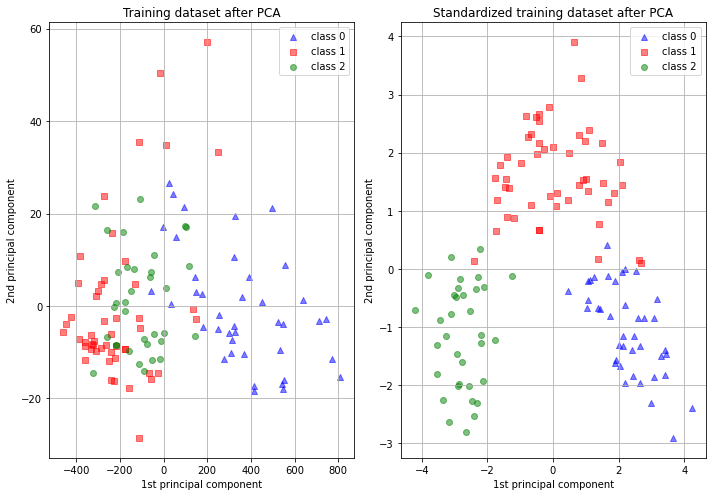

In [250]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

In [251]:
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split